In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
df=pd.read_csv('Shopping_Revenue.csv')
df.set_index('Id',inplace=True)
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3.0,5,1,3,2,3,4,3,3,4316715


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          133 non-null    float64
 10  P7          133 non-null    float64
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [4]:
df['Age in years']=2022 - df['Open Date'].str.split('/',expand=True)[2].apply(int)
df.drop('Open Date',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          137 non-null    object 
 1   City Group    137 non-null    object 
 2   Type          137 non-null    object 
 3   P1            137 non-null    int64  
 4   P2            137 non-null    float64
 5   P3            137 non-null    float64
 6   P4            137 non-null    float64
 7   P5            137 non-null    int64  
 8   P6            133 non-null    float64
 9   P7            133 non-null    float64
 10  P8            137 non-null    int64  
 11  P9            137 non-null    int64  
 12  P10           137 non-null    int64  
 13  P11           137 non-null    int64  
 14  P12           137 non-null    int64  
 15  P13           137 non-null    float64
 16  P14           137 non-null    int64  
 17  P15           137 non-null    int64  
 18  P16           137 non-null    

In [5]:
df.isna().mean()
#Since the size of our data is already quite less. So, instead of removing rows with missing values we remove the two columns 
#in question
df.drop(['P6','P7'],axis=1,inplace=True)

In [6]:
#numerical analysis of int/float columns
df.describe()
# we observe that the values of independent variables are all of similar scale and mean and median close to each other(mean mostly
#greater than median so data is positively skewed a little)

,P1,P2,P3,P4,P5,P8,P9,P10,P11,P12,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age in years
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000
mean,4.014599,4.408759,4.317518,4.372263,2.007299,5.153285,5.445255,5.489051,3.262774,5.299270,...,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06,13.321168
std,2.910391,1.514900,1.032337,1.016462,1.209620,1.858567,1.834793,1.847561,1.910767,1.941668,...,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06,4.027359
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06,8.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,5.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06,11.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,3.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06,12.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06,15.000000
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07,26.000000


<AxesSubplot:>

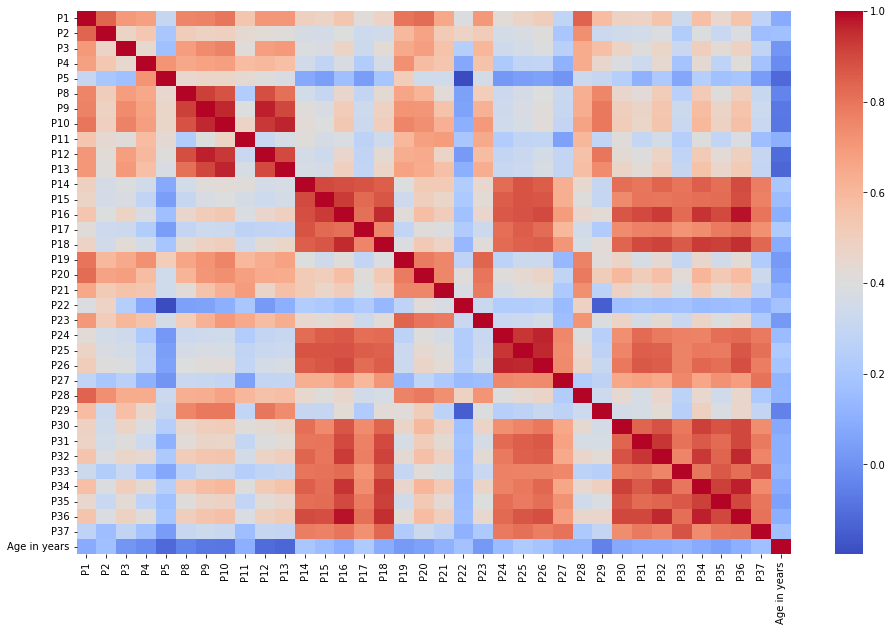

In [7]:
#correlation analysis
plt.figure(figsize = (16,10)) 
sns.heatmap(df.drop('revenue',axis=1).corr(),cmap='coolwarm')
#There is correlation among independent variables

In [8]:
#Categorical data analysis
print('No of distinct cities: {}' .format(df['City'].nunique()))
print('No of distinct city groups: {}' .format(df['City Group'].nunique()))
print('No of distinct types : {}' .format(df['Type'].nunique()))

No of distinct cities: 34
No of distinct city groups: 2
No of distinct types : 3


Based on above information, we drop 'City' column as many of the cities have only one data point which doesn't really help us at all. The we analyse Sales Revenue based on 'City Group' and 'Type' columns.

In [9]:
df.drop(['City'],axis=1,inplace=True)

<AxesSubplot:xlabel='City Group'>

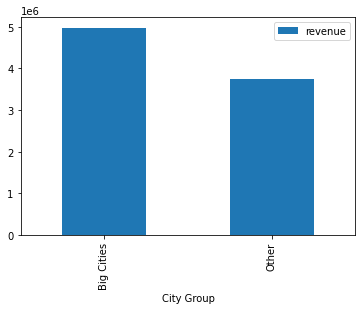

In [10]:
df.groupby(['City Group']).agg({'revenue':'mean'}).plot(kind='bar')

Higher revenue is observed in big cities

<AxesSubplot:xlabel='Type'>

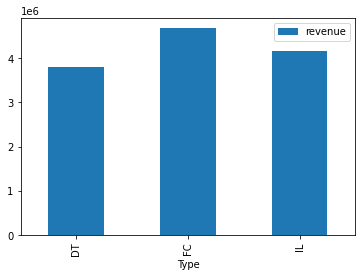

In [11]:
df.groupby('Type').agg({'revenue':'mean'}).plot(kind='bar')

Higher revenue is observed type 'FC' followed by 'IL' and then 'DT'.
Now, we try to observe revenue based on both categorical column.

<AxesSubplot:xlabel='City Group,Type'>

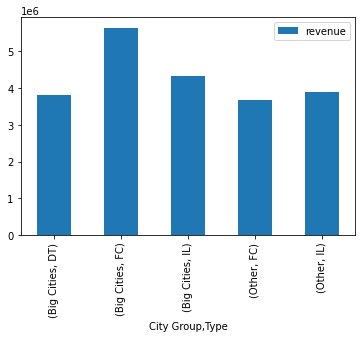

In [12]:
df.groupby(['City Group','Type']).agg({'revenue':'mean'}).plot(kind='bar')

First of all, there s no type 'DT' in case of 'other' cities. And all types earn more revenue in 'big cities'. Therefore, we must involve these categorical variables as partof our model.

Prepration = splitting data

In [13]:
type = pd.get_dummies(df['Type'],drop_first=True)
type

,FC,IL
Id,,
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,1,0
133,1,0
134,1,0


In [14]:
city=pd.get_dummies(df['City Group'])['Big Cities']
city

Id
0      1
1      1
2      0
3      0
4      0
      ..
132    0
133    1
134    0
135    1
136    1
Name: Big Cities, Length: 137, dtype: uint8

In [15]:
df=pd.concat([df,city,type],axis=1)
df.drop(['Type','City Group'],axis=1,inplace=True)

In [16]:
df.head()

,P1,P2,P3,P4,P5,P8,P9,P10,P11,P12,...,P33,P34,P35,P36,P37,revenue,Age in years,Big Cities,FC,IL
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,4,5,5,3,5,...,5,5,4,3,4,5653753,23,1,0,1
1,4,5.0,4.0,4.0,1,5,5,5,1,5,...,0,0,0,0,0,6923131,14,1,1,0
2,2,4.0,2.0,5.0,2,5,5,5,2,5,...,0,0,0,0,0,2055379,9,0,0,1
3,6,4.5,6.0,6.0,4,8,10,10,8,10,...,6,18,12,12,6,2675511,10,0,0,1
4,3,4.0,3.0,4.0,2,5,5,5,2,5,...,2,3,4,3,3,4316715,13,0,0,1


In [17]:
target='revenue'
features=df.drop(target,axis=1).columns
X=df[features]
y=df[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


Model defination and analysis

In [22]:
#Baseline
y_baseline=y_train.mean()
print('Baseline score = {}'.format(mean_absolute_error(y_train,([y_baseline]*len(y_train)))))

Baseline score = 1566761.9533709285


In [21]:
#Model 1 - Linear Regression

In [47]:
m1=LinearRegression()

scores=[]
for i in range(1,40):
    rfe = RFE(m1, n_features_to_select=i)             
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    m1.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(m1.predict(X_train_temp),y_train),mean_absolute_error(m1.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(25, 1154609.8147644396, 2903153.0294895438),
 (27, 1155534.9144407038, 2893675.6467581093),
 (26, 1155669.387520428, 2893517.953396351),
 (28, 1156252.8691396648, 2887707.1967395437),
 (29, 1156939.041416566, 2895282.0248783613),
 (24, 1156946.9855527992, 2888616.02326805),
 (36, 1158813.4773167623, 2931822.7487903447),
 (38, 1158989.7321439823, 2953278.855171843),
 (39, 1159027.7610926647, 2953257.897276573),
 (35, 1159213.266503395, 2925249.13514969),
 (37, 1159441.1478985487, 2944165.5275819786),
 (22, 1160700.33871152, 2821232.3129434693),
 (21, 1161064.3990561909, 2790902.563016006),
 (18, 1162562.6369550987, 2818740.639231317),
 (23, 1162667.3100792032, 2865953.287624974),
 (33, 1165399.6847306953, 2803604.586177601),
 (34, 1165677.5563295847, 2863139.5850372347),
 (30, 1166667.3877335594, 2813899.2865966163),
 (32, 1167989.9845112085, 2819855.711495952),
 (19, 1171466.9443963703, 2820938.1422271887),
 (17, 1173066.0804640173, 2802118.6442211764),
 (31, 1173336.1406441776, 2837

In [36]:
rfe = RFE(m1, n_features_to_select=25)             
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
m1.fit(X_train_temp,y_train)

LinearRegression()

In [37]:
mean_absolute_error(m1.predict(X_test_temp),y_test)

2903153.0294895438

As we can see above, our maximum train score is 0.5077 which is really bad. So, we move on to other methods. We could also conclude the same based on the correlation matrix as it depicts the case of multi-collinearity.

In [38]:
# model 2 - SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [46]:
m2=Ridge()
scores=[]
for i in range(1,40):
    rfe = RFE(m2, n_features_to_select=i)             
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    m2.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(m2.predict(X_train_temp),y_train),mean_absolute_error(m2.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(26, 1147701.354326906, 2795338.4563052296),
 (28, 1147880.1316093062, 2795966.994284821),
 (29, 1147962.92297095, 2795834.6757664117),
 (25, 1147970.550780368, 2804903.0373253236),
 (27, 1148193.3898207045, 2799568.0533120404),
 (18, 1152916.9100487824, 2732572.3924767156),
 (22, 1153778.0453696896, 2748058.3554873914),
 (23, 1156446.3118121552, 2788315.0391140208),
 (21, 1157323.5533932263, 2718959.8146675597),
 (24, 1157893.3206157887, 2785813.3057884774),
 (37, 1162022.4375703877, 2857112.198894467),
 (39, 1162117.4631177403, 2864715.114175212),
 (38, 1162138.1175625916, 2864495.8131526164),
 (19, 1163280.4632621272, 2748197.7558637694),
 (36, 1164192.6714438105, 2842536.8381261774),
 (17, 1164663.3504264494, 2735038.4329038775),
 (35, 1164981.6760929073, 2841045.661779688),
 (16, 1165041.8226377233, 2672384.256728978),
 (20, 1165984.855721441, 2746480.8025991316),
 (34, 1176986.8574970579, 2776385.367153745),
 (33, 1177044.4760295793, 2776400.1661985093),
 (32, 1179190.830377815,

In [53]:
rfe = RFE(Ridge(), n_features_to_select=26)             
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
m2.fit(X_train_temp,y_train)

Ridge()

In [54]:
mean_absolute_error(m2.predict(X_test_temp),y_test)

2795338.4563052296

Also, very bad.

In [55]:
#model 3 - Decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [56]:
m4=DecisionTreeRegressor(random_state=42)
m4

DecisionTreeRegressor(random_state=42)

In [57]:
params = {'max_depth': range(1, 25)}
params

{'max_depth': range(1, 25)}

In [58]:
tree = GridSearchCV(m4, params, 
                    cv=5, 
                   verbose=True)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 25)}, verbose=True)

In [60]:
mean_absolute_error(tree.predict(X_train),y_train)

1235712.5722921556

In [61]:
mean_absolute_error(tree.predict(X_test),y_test)

1921042.6986434106

In [62]:
#m4 KNN regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [63]:
m5=KNeighborsRegressor()
m5

KNeighborsRegressor()

In [64]:
params={'n_neighbors':range(10,21)}

In [65]:
NN = GridSearchCV(m5, params, 
                    cv=5, 
                   verbose=True)
NN.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(10, 21)}, verbose=True)

In [66]:
mean_absolute_error(NN.predict(X_train),y_train)

1356847.7798165134

In [67]:
mean_absolute_error(NN.predict(X_test),y_test)

2090230.5678571428

In [68]:
#m6 Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [72]:
m6=RandomForestRegressor()
m6

RandomForestRegressor()

In [73]:
params={'n_estimators':range(10,100,10),'max_depth':range(10,21)}

In [77]:
rf= GridSearchCV(m6, params, 
                    cv=5, 
                   verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [78]:
mean_absolute_error(rf.predict(X_train),y_train)

600353.5279816514

In [79]:
mean_absolute_error(rf.predict(X_test),y_test)

1839741.767857143

In [80]:
#model 7- Gradient Descent Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [81]:
m7=GradientBoostingRegressor()
m7

GradientBoostingRegressor()

In [84]:
params={'n_estimators':range(10,100,10),'max_depth':range(10,21),'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5]}

In [85]:
gb= GridSearchCV(m7, params, 
                    cv=5, 
                   verbose=True)
gb.fit(X_train, y_train)

Fitting 5 folds for each of 693 candidates, totalling 3465 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [88]:
mean_absolute_error(gb.predict(X_train),y_train)

1281465.4712254717

In [89]:
mean_absolute_error(gb.predict(X_test),y_test)

1889957.2730689435

Therefore, the best model is random forest.

In [90]:
gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [91]:
best_model=GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [92]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [96]:
feat_imp=best_model.feature_importances_
features=X_train.columns
importances=pd.Series(feat_imp,index=features).sort_values()

<AxesSubplot:>

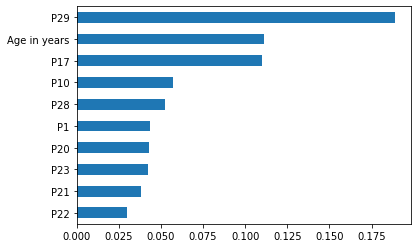

In [99]:
#10 best features
importances.tail(10).plot(kind='barh')